# Работа №6. Различение двух простых гипотез

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 1. Различение при фиксированном объеме наблюдений
Пусть имеется совокупность наблюдений $x = (x_1, ..., x_n)$, относительно которой имеется два предположения (гипотезы):  
$$
H_0: x\text{ распределена по закону } p_0(x)\\
H_1: x\text{ распределена по закону } p_1(x)
$$
(если $x$ - непрерывна, то $p_0(x), p_1(x)$ - плотности, если дискретна - вероятности).  
По $x$ требуется принять одно из двух решений: или "верна $H_0$" (решение 0), или "верна $H_1$" (решение 1). Ясно, что дело сводится к определению решающей функции $\delta(x)$, имеющей два значения 0 и 1, то есть к определению разбиения $Г = (Г_0, Г_1)$ пространства $X$ всех возможных значений $x$:
$$
\delta(x) = 0, \text{ если } x \in Г_0,\\
\delta(x) = 1, \text{ если } x \in Г_1
$$
При использовании любой решающей функции $\delta(x)$ возможны ошибки двух типов:  
ошибка 1-го рода: принятие $H_1$ при истинности $H_0$,  
ошибка 2-го рода: принятие $H_0$ при истинности $H_1$.  
Любая решающая функция характеризуется двумя условными вероятностями:
$$
\alpha = P(пр.H_1|H_0) = \inf\limits_{Г_1}p_0(x)dx,\\
\beta = P(пр.H_0|H_1) = \inf\limits_{Г_0}p_1(x)dx,
$$
которые называются вероятностями ошибок 1-го и 2-го рода соответственно. Хотелось бы иметь $\alpha$ и $\beta$ близкими к нулю, но из записи выше ясно, что, вообще говоря, если одна из них уменьшается, например, $\alpha$ (за счет уменьшения $Г_1$), то другая, $\beta$, увеоичивается (за счет увеличения $Г_0$; $Г_0 \cup Г_1 = X, Г_0 \ Г_1 = \varnothing$). Существуют различные подходы к определению оптимального правила.
#### Байесовский подход
Будем считать, что многократно сталкиваемся с пролемой выбора между $H_0$ и $H_1$; в этом случае можно гооврить о частоте, с которой истина $H_0$ (или $H_1$), то есть о том, что истинность $H_0$ (или $H_1$) - событие случайное, причем вероятность события, когда верна $H_0$ (или $H_1$),
$$
P(H_0) = q_0, P(H_1) = q_1, q_0 + q_1 = 1.
$$
Кроме того, будем считать, что за каждую ошибку 1-го рода платим штраф $W_0$, а за ошибку 2-го рода - штраф $W_1$. Если пользуемся правилом $\delta$ (с разбиением $Г$), то средний штраф от однократного использования его
$$
R(Г) = q_0 \cdot \alpha(Г) \cdot W_0 + q_1 \cdot \beta(Г) \cdot W_1.
$$
Назовем правило $\delta$ (соответственно разбиение $Г = (Г_0, Г_1)$) оптимальным (в байесовском смысле), если
$$
R(Г) = \min\limits_{Г'}R(Г')
$$
Оказывается оптимальным является правилос, для которого область $Г_1$ такова:
$$
Г_1 = \big( x: {p_1(x)\over{p_0(x)}} \ge h = {q_0W_0\over{q_1W_1}} \big).
$$
В частном случае, если $W_0 = W_1 = 1$, $R(Г)$ имеет смысл безусловной вероятности ошибки, а соответствующее оптимальное правило называется правилом "идеального наблюдателя" или правилом Зигерта-Котельникова.
#### Подход Неймана-Пирсона
Оптимальным (в смысле Неймана-Пирсона) назовем такое правило, которое имеет заданную вероятсноть ошибки первого рода, а вероятность ошибки второго рода при этом минимальна. Формально, если правило $\delta$ (соответственно разбиение $Г$) оптимально, если
$$
\beta(Г) = \min\limits_{Г'} \beta(Г'), \text{ при условии } \alpha(Г') \le \alpha_0.
$$
Оказывается, для оптимального правила область $Г_1$ такова:
$$
Г_1 = \big( x: {p_1(x)\over{p_0(x)}} \ge h \big),
$$
где $h$ определяется из условия $\alpha(h) = \alpha_0$.  
Замечание. Приведенный результат есть частный случай функдаментальной леммы Неймана-Пирсона, справедливый при условии, что существует корень $h$ уравнения для $\alpha(h)$. Это условие не является существенно ограничивающим: действительно, при изменении $h$ от $0$ до $\inf$ область $Г_1$ уменьшается, и $\alpha(h)$ уменьшается от $1$ до $0$. Можно, однако, привести примеры, когда $\alpha(h)$ имеет скачки, и тогда область $Г_1$ требует некоторого простого уточнения.

**Пример 1. Различение гипотез о среднем нормальной совокупности.** На вход канала связи подается сигнал $S$, который может принимать два значения: $S = 0$ (сигнала нет), $S = a \neq 0$ (сигнал есть). В канале действует аддитивная случайная ошибка $\varepsilon$, нормально распределенная со средним $M\varepsilon = 0$ и дисперсией $D\varepsilon = \sigma^2$; результатом является $x' = S + \varepsilon$. Измерения повторяются $n$ раз, так что на выходе имеются наблюдения $(x_1, ..., x_n) = x$, по которым нужно решить, есть ли сигнал $(H_1: S = a)$ или нет $(H_0: S = 0)$. Требуется построить решающее правило $\delta$, имеющее заданную вероятность $\alpha_0$ ошибки первого рода (вероятность ложной тревоги)
$$
\alpha = P(\text{принять }H_1|H_0) = \alpha_0
$$
при минимальном значении вероятность $\beta$ ошибки второго рода (вероятности пропуска).

Считая ошибки независимыми, с учетом того, есть ли сигнал $(H_1)$ или его нет $H_0)$, имеем
$$
p_1(x) = \prod\limits_{i=1}^{n} {1\over{\sqrt{2 \pi \sigma^2}}} e^{- {(x_i-a)^2\over{2\sigma^2}}}\\
p_0(x) = \prod\limits_{i=1}^{n} {1\over{\sqrt{2 \pi \sigma^2}}} e^{- {x_i^2\over{2\sigma^2}}}
$$
В соотвествии с 
$$
Г_1 = \big{\{}x: {p_1(x)\over{p_0(x)}} \geq h \big{\}}
$$
решение о наличии сигнала нужно принять (принять $H_1$), если $x$ попадает в $Г_1$, где
$$
Г_1 = \big{\{} x: ln{p_1(x)\over{p_0(x)}} \geq ln(h_1) = h_1\big{\}} = \big{\{} x: {1\over{2\sigma^2}} \big{(} 2a\sum\limits_{i=1}^{n}x_i - na^2 \big{)} \geq h_1\big{\}} = \big{\{} x: \sum\limits_{i=1}^{n}x_i \geq h_2 = {h_1 2\sigma^2 + na^2\over{2a}} \big{\}}
$$
Итак, если $\sum\limits_{i=1}^{n}x_i \geq h_2$, то принимается $H_1$; в противоположном случае принимается $H_0$. Порог $h_2$ определяется из
$$
\alpha(h_2) = P(пр.H_1|H_0) = P(\sum\limits_{i=1}^{n}x_i \geq h_2 | H_0) = \alpha_0
$$
Усли верна $H_0$, то $\sum\limits_{i=1}^{n}x_i$ распределена нормально со средним 0 и дисперсией $n\sigma^2$, и потому последнее условие принимает вид:
$$
\alpha(h_2) = 1 - Ф({h_2\over{\sqrt{n\sigma^2}}}) = \alpha_0
$$
откуда
$$
h_2 = \sigma \sqrt{n} Q(1-\alpha_0)
$$
где $Ф(x)$ - функция стандартного нормального распределения $N(0, 1)$; $Q(1-\alpha_0)$ - квантиль порядка $(1-\alpha_0)$ этого распределения.  
Определелим вероятность $\beta$ ошибки второго рода для этой процедуры с порогом $h_2$. Если верна $H_1$, то $\sum\limits_{i=1}^{n}x_i$ распределена нормально со средним $na$ и дисперсией $n\sigma^2$, и потому
$$
\beta = P(пр.H_0|H_1) = P\big{\{} \sum\limits_{i=1}^{n}x_i < h_2 | H_1 \big{\}} = Ф\big{(} {h_2 - na \over{\sigma\sqrt{n}}} \big{)} = Ф(Q - {a\over{\sigma}}\sqrt{n})
$$
Положим, $a = 0.2$, $\sigma = 1.0$ (то есть ошибка $\sigma$ в 5 раз больше сигнала $a$), $n = 500$, $\alpha = 10^{-2}$;  
при этом $h_2 = 1 \cdot \sqrt{500} \cdot 2.33 = 52$, $\beta = Ф(2.33 - 0.2 \cdot 22.4) = Ф(-2.14) = 1.6 \cdot 10^{-2}$; как видим, вероятности ошибок невелики: порядка $10^{-2}$

**Моделирование.** Проиллюстрируем этот пример стастически, с помощью пакета. Сгенерируем две выборки объема $n = 500$ в соответствии с гипотезами $H_0$ и $H_1$. Для обеих выборок построим гистограммы (в диапазоне от -2.5 до 2.5 с 20 интервалами) и убедимся, что "на глаз" различие не заметно. Определим сумму наблюдений по каждой выборке и применим решающее правило с порогом $h_2$. Убедимся, что в обоих случаях решающее правило дает правильное решение.

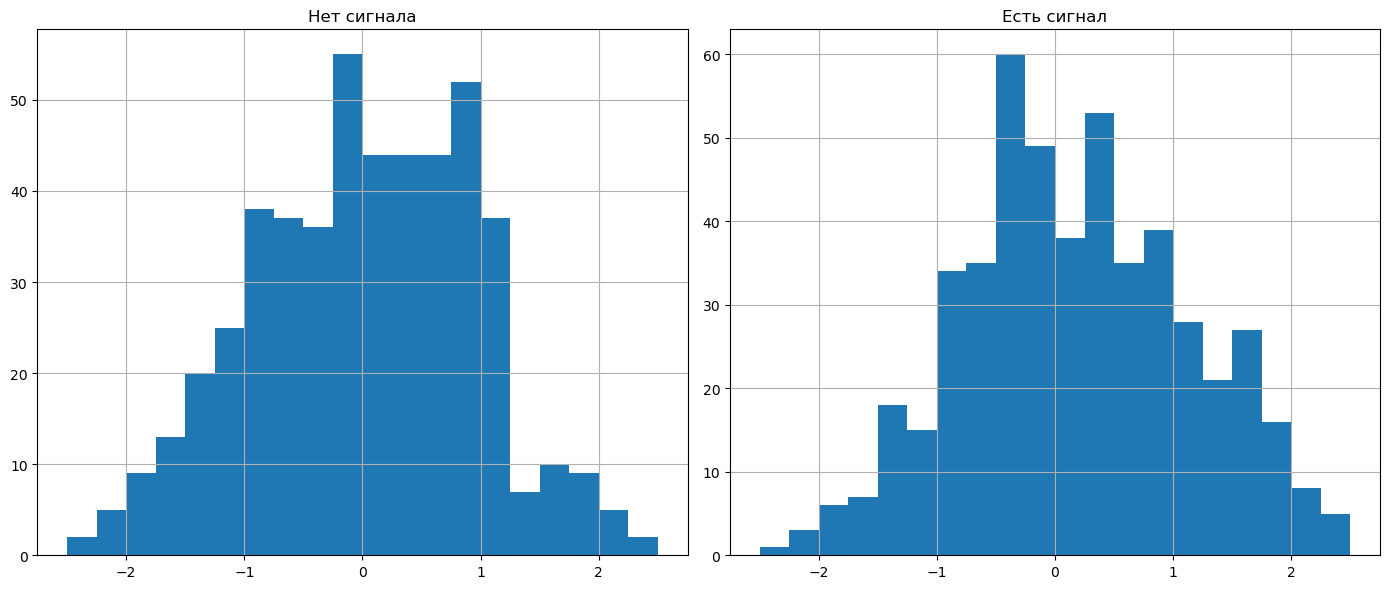

In [2]:
a = 0.2
sigma = 1
n = 500
alpha = 1 / np.power(10, 2)

data0 = np.random.normal(0, sigma, n)
data1 = np.random.normal(a, sigma, n)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data0, bins=20, range=(-2.5, 2.5))
plt.title('Нет сигнала')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(data1, bins=20, range=(-2.5, 2.5))
plt.title('Есть сигнал')
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
h2 = sigma * np.sqrt(n) * stats.norm.ppf(1-alpha)

s0 = data0.sum()
s1 = data1.sum()

print('Пороговое значение:', h2)
print('\nПервая выборка:')
print('Сумма:', s0)
print('Вывод:', 'сигнала нет' if s0 < h2 else 'сигнал есть')
print('\nВторая выборка:')
print('Сумма:', s1)
print('Вывод:', 'сигнала нет' if s1 < h2 else 'сигнал есть')

Пороговое значение: 52.01871985667439

Первая выборка:
Сумма: 1.8186271663694145
Вывод: сигнала нет

Вторая выборка:
Сумма: 95.39136131302797
Вывод: сигнал есть


### 2. Последовательное различение двух простых гипотез (последовательный анализ Вальда)
Задачу различения двух простых гипотез поставим иначе. Объем наблюдений фиксировать не будем. Рассмотрим правило различения, которое имело бы заданные уровни вероятностей ошибок и при этом требовало минимальное в среднем число наблюдений. Во многих практических ситуациях требование скорейшего принятия решения является весьма существенным, например, испытания надежности, выборочный контроль, принятие решения о наличии цели в радиолокации, испытания экономической системы и т.д.  
Пусть $x_1, ..., x_n, ...$ - последовательность независимых, одинаково распределенных случайных величин. Относительно распределения имеется два предположения:
$$
H_0: x\text{ наблюдения распределены с плотностью } p_0(x),\\
H_1: x\text{ наблюдения распределены с плотностью } p_1(x);
$$
(если наблюдения дискретны, то $p_0(x), p_1(x)$ - вероятности).  
После каждого наблюдения предоставляется выбор из трез возможных решений:
* принять $H_0$ и закончить наблюдения,
* принять $H_1$ и закончить наблюдения,
* не принимать ни одну из гипотез и продолжить наблюдения.  

**Формулировка решающего правила** (последовательный критерий отношения вероятностей). Рассморим следующую процедуру $\delta$. Зафиксируем два порога: верхний $A$ и нижний $B$: $0 \lt B \lt 1 \lt A$. Пусть уже получено $n$ наблюдений ($n = 1, 2, ...$); обозначим
$$
L_n(x_1, ..., x_n) = \prod\limits_{i=1}^n {p_1(x_i)\over{p_0(x_i)}} \text{ - отношение правдоподобия.}
$$
Процедура $\delta^*$ на очередном шаге $n$ такова:
* если $L_n(x_1, ..., x_n) \ge A$, то принимается $H_1$ и наблюдения заканчиваются,
* если $L_n(x_1, ..., x_n) \le B$, то принимается $H-0$ и наблюдения заканчиваются,
* если $B \le L_n(x_1, ..., x_n) \le A$, то делается еще одно наблюдение.

Очевидно, эта процедура характеризуется некоторыми вероятностями ошибок и средними числами наблюдений:
$$
\alpha = \alpha(A, B) = P(пр.H_1|H_0),\\
\beta = \beta(A, B) = P(пр.H_0|H_1),\\
n_0 = n_0(A, B) = M(\nu | H_0),\\
n_1 = n_1(A, B) = M(\nu | H_1),
$$
где $\nu$ - число наблюдений (случайная величина) до принятия окончательного решения. Если $\alpha_0$ и $\beta_0$ заданы, то в принципе можно найти пороги $A$ и $B$, то есть правило $\delta^*$. Оказывается, такое правило обладает правилом оптимальности.  
**Теорема** (Вальд и Вольфивиц, 1948 г.). Среди всех решающих правил $\delta '$, обладающих свойством
$$
\alpha(\delta ') \le \alpha_0, \beta(\delta ') \le \beta_0,
$$
последовательный критерий отношения вероятностей $\delta^*$ имеет минимальные средние числа наблюдений:
$$
n_0(\delta^*) \le n_0(\delta '), n_1(\delta^*) \le n_1(\delta '),
$$
Заметим, что минимальность достигается сразу по двум характеристикам.  
**Основные формулы.** Легко показать справедливость неравенств, связывающих пороги с вероятностями ошибок:
$$
A \le {1-\beta\over{\alpha}}, B \ge {\beta\over{1-\alpha}}.
$$
Вместо неизвестных значений $A$ и $B$ возьмем их приближенные значения $A'$ и $B'$:
$$
A = A' = {1-\beta\over{\alpha}}, B = B' = {\beta\over{1-\alpha}}.
$$
Конечно, при таком выборе порогов будем иметь не $\alpha$ и $\beta$, а некоторые $\alpha '$ и $\beta '$. Оказывается, последние несущественно меньше требуемых $\alpha$ и $\beta$.  
Для средних чисел наблюдений справедливы следующие приближенные (обычно с хорошей точностью) формулы:
$$
n_0 = M(\nu | H_0) = {\alpha lnA' + (1-\alpha)lnB'\over{M(\zeta_i|H_0)}},\\
n_1 = M(\nu | H_1) = {(1-\beta)lnA' + \beta lnB'\over{M(\zeta_i|H_1)}},\\
\text{где } \zeta = ln{p_1(x)\over{p_0(x)}},\\
M(\zeta|H_i) = \int ln{p_1(x)\over{p_0(x)}} p_i(x) dx, i=0,1.
$$  
**Функция мощности  соежгее число наблюдений, как функция параметра.** Пусть $x_1, ..., x_n, ...$ - последовательность независимых наблюдений, подчиняющихся закону $p(x|a)$, зависящему от параметра $a$. Проверяется гипотеза $H_0: a = a_0$ при альтернативе $H_1: a = a_1$. Для различения гипотез используем последовательный критерий отношения вероятностей с порогами $A(\alpha, \beta)$ и $B(\alpha, \beta)$. В реальных задачах весьма часто альтернатива $H_1$ (то есть значение параметра $a_1$) выбирается условно, и наблюдения могут подчиняться закону $p(x|a)$ при некотором значении $a$, не равном $a_0$ или $a_1$, и потому необходимо знать характеристики правила при произвольном $a$.  
Функция мощности $W(a) = P(отк. H_0|a)$ определяется следующим образом:
$$
W(a) = {1-B^h\over{A^h - B^h}},
$$
где $h$ находится из уравнения
$$
\int \big[ {p_1(x)\over{p_0(x)}} \big]^h p(x|a) dx = 1.
$$
$W(a)$ можно вычислить параметрически, зная $W(h)$ и $a(h)$. Среднее число наблюдений:
$$
n(a) = M(\nu|a) = {W(a)lnA + (1-W(a))lnB\over{M(\zeta|a)}}, \text{ где } M(\zeta|a) = \int ln{p_1(x)\over{p_0(x)}} p(x|a) dx.
$$

#### Задача 1.
Измерение на выходе радиолокационного приемника подчиняется распределению Релея, которое имеет плотность
$$
p(x|\sigma) = {x\over{\sigma^2}} e^{-{x^2\over{2\sigma^2}}}, x \geq 0.
$$
Если отраженного сигнала нет, то параметр $\sigma = \sigma_0$; если сигнал есть, то $\sigma = \sigma_1 \geq \sigma_0$.
1. По выборке объема $n$ построить процедуру Неймана-Пирсона обнаружения отраженного сигнала. Объем n выбирать так, чтобы обеспечить заданные вероятности $\alpha$ и $\beta$ ошибок первого и второго рода. Смоделировать две выборки: при $\sigma = \sigma_0$ и при $\sigma = \sigma_1$. Применить к ним построенную процедуру и выяснить, верные ли решения принимаются.
2. Построить последовательную процедуру обнаружения отраженного сигнала. Определить среднее число наблюдений и функцию мощности как функцию параметра $\sigma$. Смоделировать процесс наблюдения и принятия решения в случаях, когда отраженный сигнал есть и когда его нет. Изобразить его графически (по одной реализации).  
Сравнить число наблюдений для процедур 1 и 2.
Исходные данные:  
$\sigma_0 = 2.0$  
$\sigma_1 = 2.5$  
$\alpha = 0.05$  
$\beta = 0.02$

**№1**  
Гипотеза $H_0: \sigma = \sigma_0$ (сигнала нет)  
Гипотеза $H_1: \sigma = \sigma_1$ (сигнал есть)  
$$
p_0(x) = \prod\limits_{i=1}^{n} {x\over{\sigma_0^2}} e^{- {x_i^2\over{2\sigma_0^2}}}\\
p_1(x) = \prod\limits_{i=1}^{n} {x\over{\sigma_1^2}} e^{- {x_i^2\over{2\sigma_1^2}}}\\
Г_1 = \big{\{} x: ln{p_1(x)\over{p_0(x)}} \geq ln(h_1) = h_1\big{\}} = \big{\{} x: 2nln(\sigma_0) - 2nln(\sigma_1) + {\sum\limits_{i=1}^nx_i^2\over{2\sigma_0^2}} - {\sum\limits_{i=1}^nx_i^2\over{2\sigma_1^2}} \geq h_1\big{\}} = \big{\{} x: \sum\limits_{i=1}^{n}x_i^2 \geq h_2 = {\sigma_0^2\sigma_1^2[2h_1-4n(ln(\sigma_0)-ln(\sigma_1))]\over{\sigma_1^2 - \sigma_0^2}} \big{\}}
$$
Если $\sum\limits_{i=1}^{n}x_i^2 \geq h_2$, то принимается $H_1$; в противоположном случае принимается $H_0$. Порог $h_2$ определяется из
$$
\alpha(h_2) = P(пр.H_1|H_0) = P(\sum\limits_{i=1}^{n}x_i^2 \geq h_2 | H_0) = \alpha_0
$$
$x_i^2$ есть квадратичное преобразование $x_i$, в результате преобразования случайная величина $x_i^2$ распределена экспоненциально с параметром ${1\over{2\sigma^2}}$:
$$
x_i^2 \text{~} E({1\over{2\sigma^2}})
$$
Если верна $H_0$, то $\sum\limits_{i=1}^{n}x_i^2$ по ЦПТ распределена нормально со средним $2n\sigma_0^2$ и дисперсией $4n\sigma_0^4$, и потому последнее условие принимает вид:
$$
\alpha(h_2) = 1 - Ф\big({h_2 - 2n\sigma_0^2\over{2\sigma_0^2\sqrt{n}}}\big) = \alpha_0
$$
откуда
$$
h_2 = 2\sigma_0^2\sqrt{n}Q(1-\alpha) + 2n\sigma_0^2
$$
где $Ф(x)$ - функция стандартного нормального распределения $N(0, 1)$; $Q(1-\alpha_0)$ - квантиль порядка $(1-\alpha_0)$ этого распределения.  
Определелим вероятность $\beta$ ошибки второго рода для этой процедуры с порогом $h_2$. Если верна $H_1$, то $\sum\limits_{i=1}^{n}x_i^2$ по ЦПТ распределена нормально со средним $2n\sigma_1^2$ и дисперсией $4n\sigma_1^4$, и потому
$$
\beta = P(пр.H_0|H_1) = P\big{\{} \sum\limits_{i=1}^{n}x_i^2 < h_2 | H_1 \big{\}} = Ф\big{(} {h_2 - 2n\sigma_1^2 \over{2\sqrt{n}\sigma_1^2}} \big{)}\\
n = \big({\sigma_0^2Q(1-\alpha) - \sigma_1^2Q(\beta)\over{\sigma_1^2 - \sigma_0^2}}\big)^2
$$

In [4]:
alpha = 0.05
beta = 0.02
sigma0 = 2
sigma1 = 2.5

n = np.power(sigma0, 2)*stats.norm.ppf(1-alpha) - np.power(sigma1, 2)*stats.norm.ppf(beta)
n /= np.power(sigma1, 2) - np.power(sigma0, 2)
n = np.power(n, 2)
n = int(np.ceil(n))
print(f'Число наблюдений n = {n}')

Число наблюдений n = 75


In [5]:
data0 = np.random.rayleigh(sigma0, n)
data1 = np.random.rayleigh(sigma1, n)

h2 = 2*np.power(sigma0, 2)*np.sqrt(n)*stats.norm.ppf(1-alpha) + 2*n*np.power(sigma0, 2)

s0 = data0*data0
s0 = s0.sum()
s1 = data1*data1
s1 = s1.sum()

print('Пороговое значение:', h2)
print('\nПервая выборка:')
print('Сумма квадратов:', s0)
print('Вывод:', 'сигнала нет' if s0 < h2 else 'сигнал есть')
print('\nВторая выборка:')
print('Сумма квадратов:', s1)
print('Вывод:', 'сигнала нет' if s1 < h2 else 'сигнал есть')

Пороговое значение: 713.9588021157558

Первая выборка:
Сумма квадратов: 590.937490737012
Вывод: сигнала нет

Вторая выборка:
Сумма квадратов: 868.1088232886362
Вывод: сигнал есть


**№2**  
Условие продолжения:
$$
lnB < lnL_n < lnA
$$
где
$$
lnL_n = 2nln\big({\sigma_0\over{\sigma_1}}\big) + {1\over2}{\sigma_1^2-\sigma_0^2\over{\sigma_0^2\sigma_1^2}}\sum\limits_{i=1}^nx_i^2
$$
Подставим в условие продолжения:
$$
lnB < 2nln\big({\sigma_0\over{\sigma_1}}\big) + {1\over2}{\sigma_1^2-\sigma_0^2\over{\sigma_0^2\sigma_1^2}}\sum\limits_{i=1}^nx_i^2 < lnA\\
{2\sigma_0^2\sigma_1^2\over{\sigma_1^2-\sigma_0^2}}\big[lnB+2nln\big({\sigma_1\over{\sigma_0}}\big)\big] < \sum\limits_{i=1}^nx_i^2 < {2\sigma_0^2\sigma_1^2\over{\sigma_1^2-\sigma_0^2}}\big[lnA+2nln\big({\sigma_1\over{\sigma_0}}\big)\big]\\
A = {1-\beta\over{\alpha}}, B = {\beta\over{1-\alpha}}
$$

In [6]:
def procedure(sigma, sigma_0, sigma_1, alpha, beta):
    A = (1-beta) / alpha
    B = beta / (1-alpha)
    left = []
    right = []
    values = []
    c = 2*np.power(sigma_0, 2)*np.power(sigma_1, 2) / (np.power(sigma_1, 2) - np.power(sigma_0, 2))
    loga = np.log(A)
    logb = np.log(B)
    logsigma = 2*np.log(sigma_1/sigma_0)
    while True:
        v = np.random.rayleigh(sigma)
        values.append(v*v)
        n = len(values)
        left_value = c*(logb + n*logsigma)
        left.append(left_value)
        right_value = c*(loga + n*logsigma)
        right.append(right_value)
        s = np.sum(values)
        if s < left_value or s > right_value:
            break
    return values, left, right

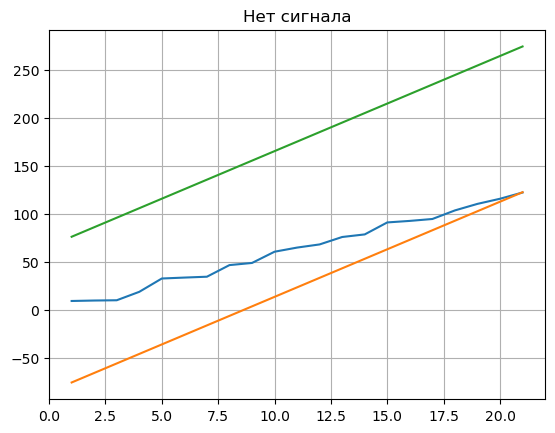

In [7]:
v, l, r = procedure(sigma0, sigma0, sigma1, alpha, beta)

sums = []
p = 0
for value in v:
    p += value
    sums.append(p)

x = range(1, len(v)+1)
plt.plot(x, sums)
plt.plot(x, l)
plt.plot(x, r)
plt.title('Нет сигнала')
plt.grid()

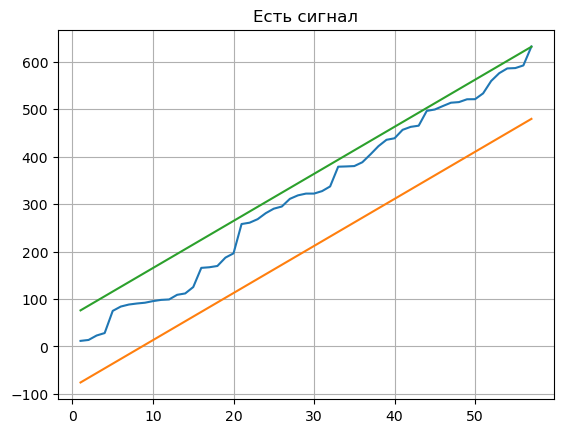

In [8]:
v, l, r = procedure(sigma1, sigma0, sigma1, alpha, beta)

sums = []
p = 0
for value in v:
    p += value
    sums.append(p)

x = range(1, len(v)+1)
plt.plot(x, sums)
plt.plot(x, l)
plt.plot(x, r)
plt.title('Есть сигнал')
plt.grid()

Найдем среднее число наблюдений для последовательной процедуры:
$$
\zeta_i = 2ln({\sigma_0\over{\sigma_1}}) + {1\over2} \big( {\sigma_1^2 - \sigma_0^2\over{\sigma_0^2\sigma_1^2}} \big) x_i^2\\
M(\zeta_i|H_0) = 2ln({\sigma_0\over{\sigma_1}}) + {1\over2} \big( {\sigma_1^2 - \sigma_0^2\over{\sigma_0^2\sigma_1^2}} \big) M(x_i^2) = 2ln({\sigma_0\over{\sigma_1}}) + {\sigma_1^2 - \sigma_0^2\over{\sigma_1^2}}\\
M(\zeta_i|H_1) = 2ln({\sigma_0\over{\sigma_1}}) + {1\over2} \big( {\sigma_1^2 - \sigma_0^2\over{\sigma_0^2\sigma_1^2}} \big) M(x_i^2) = 2ln({\sigma_0\over{\sigma_1}}) + {\sigma_1^2 - \sigma_0^2\over{\sigma_0^2}}\\
n_0 = {\alpha lnA + (1-\alpha)lnB\over{M(\zeta_i|H_0)}}\\
n_1 = {(1-\beta)lnA + \beta lnB\over{M(\zeta_i|H_1)}}
$$

In [9]:
A = (1-beta) / alpha
B = beta / (1-alpha)
n0 = alpha*np.log(A) + (1-alpha)*np.log(B)
n0 /= 2*np.log(sigma0/sigma1) + (np.power(sigma1, 2) - np.power(sigma0, 2)) / np.power(sigma1, 2)
print(f'n0 = {int(np.ceil(n0))}')

n1 = (1-beta)*np.log(A) + beta*np.log(B)
n1 /= 2*np.log(sigma0/sigma1) + (np.power(sigma1, 2) - np.power(sigma0, 2)) / np.power(sigma0, 2)
print(f'n1 = {int(np.ceil(n1))}')

n0 = 41
n1 = 25


Как видно, при последовательной процедуре требуется примерно в 2 раза меньше наблюдений, чем при процедуре Неймана-Пирсона.

Определим функцию мощности $W(\sigma)$, как функцию параметра $\sigma$:
$$
W(\sigma) = P(откл.H_0|\sigma) = P(пр.H_1|\sigma) = P(\sum\limits_{i=1}^n x_i^2 >= h_2|\sigma) = 1 - P(\sum\limits_{i=1}^n x_i^2 < h_2|\sigma) = 1 - Ф\big( {h_2 - 2n\sigma^2\over{2\sigma^2\sqrt{n}}} \big)
$$

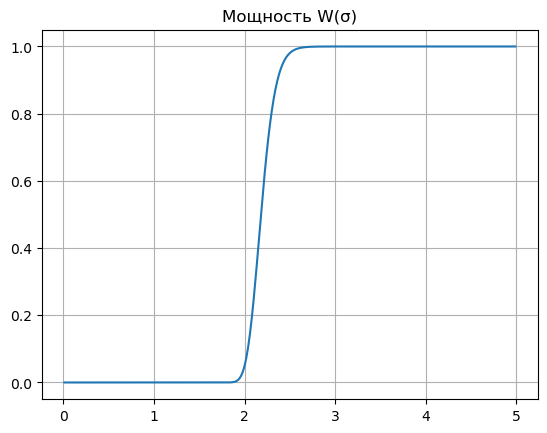

In [10]:
x = np.arange(0.01, 5, 0.01)
y = 1 - stats.norm.cdf((h2-2*n*np.power(x, 2))/(2*np.power(x, 2)*np.sqrt(n)))

plt.plot(x, y)
plt.title('Мощность W(σ)')
plt.grid()